### Data Dictionary

In this problem, we'll be clustering articles published on Daily Kos, an American political blog that publishes news and opinion articles written from a progressive point of view. 

The file dailykos.csv contains data on 3,430 news articles or blogs that have been posted on Daily Kos. These articles were posted in 2004, leading up to the United States Presidential Election. The leading candidates were incumbent President George W. Bush (republican) and John Kerry (democratic). Foreign policy was a dominant topic of the election, specifically, the 2003 invasion of Iraq. 

Each of the variables in the dataset is a word that has appeared in at least 50 different articles (1,545 words in total). The set of  words has been trimmed according to some of the techniques covered in the previous week on text analytics (punctuation has been removed, and stop words have been removed). For each document, the variable values are the number of times that word appeared in the document. 

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(style='darkgrid',font_scale=1.25)

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

import scipy.cluster.hierarchy as sch

pd.set_option('display.max_columns', None) 

In [2]:
df = pd.read_csv("dailykos.csv")

In [3]:
df

abandon  abc  ability  abortion  absolute  abstain  abu  abuse  accept  \
0           0    0        0         0         0        0    0      0       0   
1           0    0        0         0         0        0    0      0       0   
2           0    0        0         0         0        1    0      0       0   
3           0    0        0         0         0        0    0      0       0   
4           0    0        0         0         0        0    0      0       0   
...       ...  ...      ...       ...       ...      ...  ...    ...     ...   
3425        0    0        0         0         0        0    0      0       0   
3426        0    0        0         0         0        0    0      0       0   
3427        0    0        0         0         0        0    0      0       0   
3428        0    0        0         0         0        0    0      0       0   
3429        0    0        0         0         0        0    0      0       0   

      access  accomplish  account  accurate  accusations  achieve  \
0          0           0        0         0            0        0   
1          0           0        0         0            0        0   
2          0           0        2         0            0        0   
3          0           0        0         0            2        0   
4          0           0        0         0            0        0   
...      ...         ...      ...       ...          ...      ...   
3425       0           0        0         0            0        0   
3426       0           0        0         0            0        0   
3427       0           0        0         0            0        0   
3428       0           0        0         0            0        0   
3429       0           0        0         0            0        0   

      acknowledge  act  action  active  activist  actual  add  added  \
0               0    0       2       0         0       0    0      1   
1               0    0       0       0         0       0    0      0   
2               0    0       0       0         0       0    0      0   
3               0    0       0       0         0       0    0      0   
4               0    0       0       0         0       0    0      1   
...           ...  ...     ...     ...       ...     ...  ...    ...   
3425            0    0       0       0         0       0    0      0   
3426            0    0       0       0         0       0    0      0   
3427            0    0       0       0         0       0    0      0   
3428            0    0       0       0         0       0    0      0   
3429            0    0       0       0         0       0    0      0   

      addition  address  admin  administration  admit  advance  advantage  \
0            0        0      0               1      0        0          0   
1            0        0      0               0      0        0          0   
2            0        0      1               0      0        0          0   
3            0        0      0               0      0        0          1   
4            0        0      0               0      1        0          0   
...        ...      ...    ...             ...    ...      ...        ...   
3425         0        0      0               1      0        0          0   
3426         0        0      0               0      0        0          0   
3427         0        0      0               3      0        0          0   
3428         0        0      0               2      0        0          0   
3429         0        0      0               1      0        0          0   

      advertise  advised  affair  affect  affiliate  afghanistan  afraid  \
0             0        0       0       0          0            0       0   
1             0        0       0       0          0            0       0   
2             1        0       0       0          0            0       0   
3             0        0       0       0          0            0       0   
4             0        0       0       0      

In [4]:
X = df.iloc[:,0:1545]

In [5]:
X.values

array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

### Use Dendogram

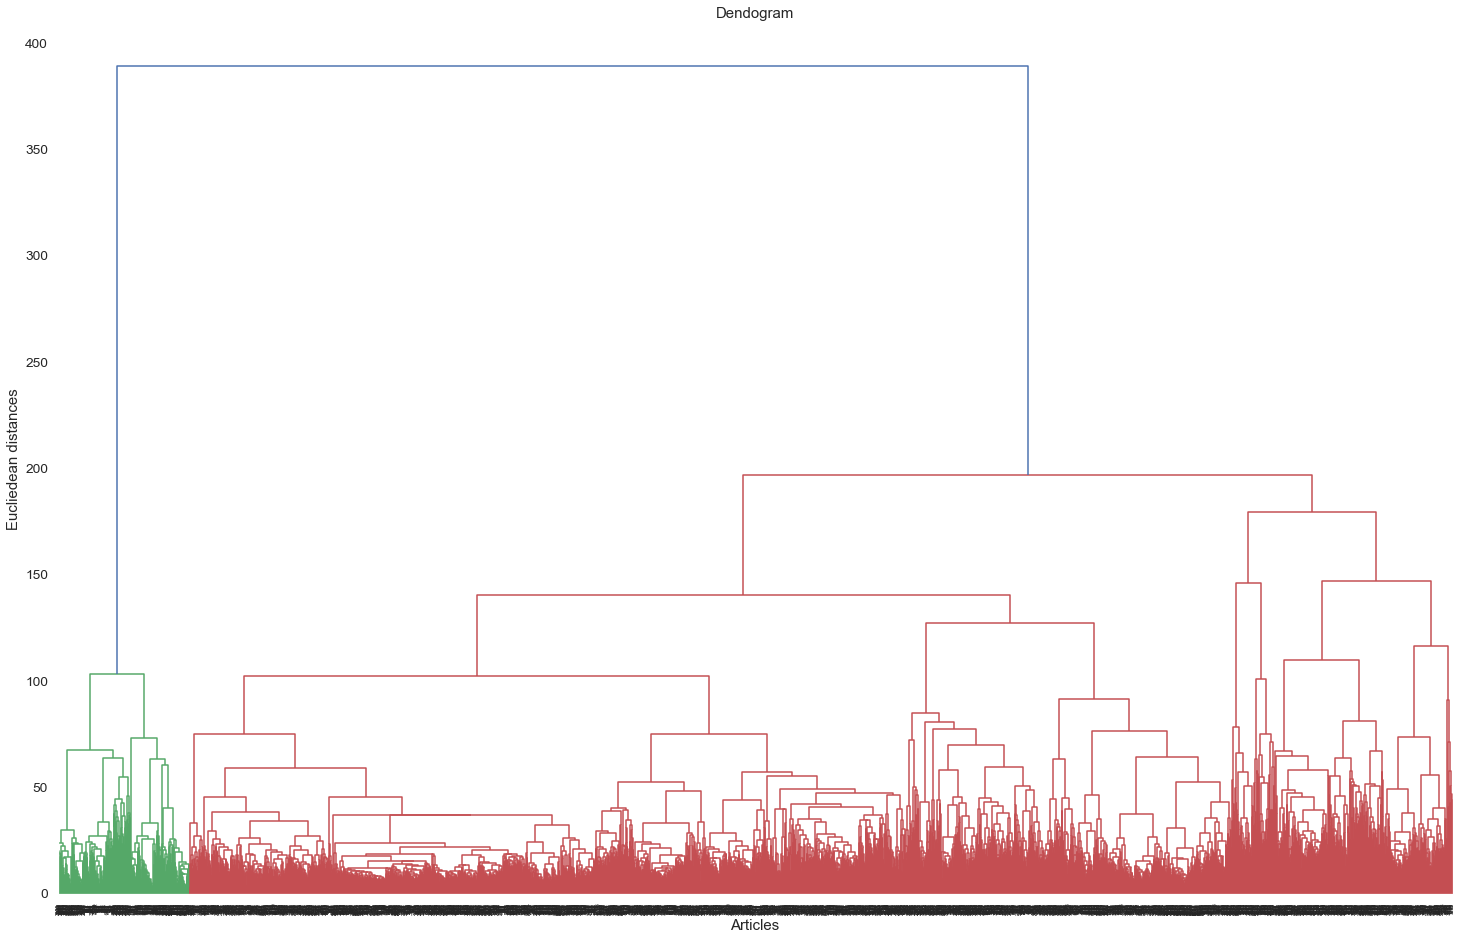

In [6]:
plt.figure(figsize=(25,16))
dendogram = sch.dendrogram(sch.linkage(X,method='ward'),truncate_mode='level',color_threshold=None)
plt.title("Dendogram")
plt.xlabel("Articles")
plt.ylabel("Eucliedean distances")
plt.show()

### Fitting hierachical cluster

In [7]:
hc = AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')

In [8]:
y_hc = hc.fit_predict(X)

In [9]:
y_hc

array([2, 0, 1, ..., 2, 2, 2], dtype=int64)

### K-Means Clustering

In [10]:
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

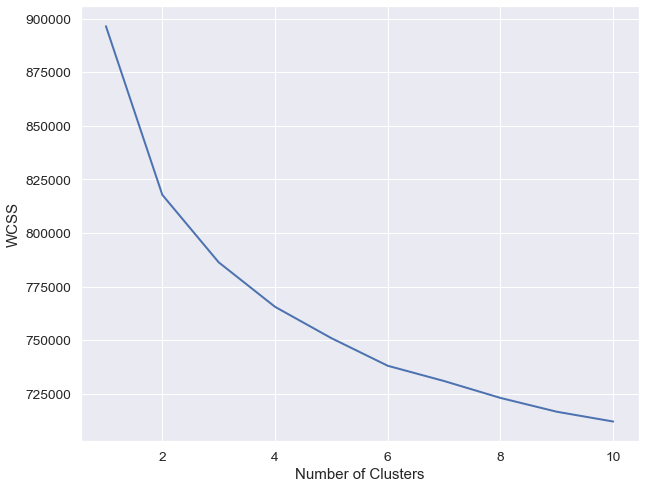

In [11]:
plt.figure(figsize=(10,8))
plt.plot(range(1,11),wcss,linewidth=2)
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

### Execute K-Means after determining the suitable cluster

In [12]:
kmeans = KMeans(n_clusters=7,init='k-means++',random_state=0)

In [13]:
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

### Results

In [14]:
df_segm_kmeans = df.copy()

In [15]:
df_segm_kmeans

abandon  abc  ability  abortion  absolute  abstain  abu  abuse  accept  \
0           0    0        0         0         0        0    0      0       0   
1           0    0        0         0         0        0    0      0       0   
2           0    0        0         0         0        1    0      0       0   
3           0    0        0         0         0        0    0      0       0   
4           0    0        0         0         0        0    0      0       0   
...       ...  ...      ...       ...       ...      ...  ...    ...     ...   
3425        0    0        0         0         0        0    0      0       0   
3426        0    0        0         0         0        0    0      0       0   
3427        0    0        0         0         0        0    0      0       0   
3428        0    0        0         0         0        0    0      0       0   
3429        0    0        0         0         0        0    0      0       0   

      access  accomplish  account  accurate  accusations  achieve  \
0          0           0        0         0            0        0   
1          0           0        0         0            0        0   
2          0           0        2         0            0        0   
3          0           0        0         0            2        0   
4          0           0        0         0            0        0   
...      ...         ...      ...       ...          ...      ...   
3425       0           0        0         0            0        0   
3426       0           0        0         0            0        0   
3427       0           0        0         0            0        0   
3428       0           0        0         0            0        0   
3429       0           0        0         0            0        0   

      acknowledge  act  action  active  activist  actual  add  added  \
0               0    0       2       0         0       0    0      1   
1               0    0       0       0         0       0    0      0   
2               0    0       0       0         0       0    0      0   
3               0    0       0       0         0       0    0      0   
4               0    0       0       0         0       0    0      1   
...           ...  ...     ...     ...       ...     ...  ...    ...   
3425            0    0       0       0         0       0    0      0   
3426            0    0       0       0         0       0    0      0   
3427            0    0       0       0         0       0    0      0   
3428            0    0       0       0         0       0    0      0   
3429            0    0       0       0         0       0    0      0   

      addition  address  admin  administration  admit  advance  advantage  \
0            0        0      0               1      0        0          0   
1            0        0      0               0      0        0          0   
2            0        0      1               0      0        0          0   
3            0        0      0               0      0        0          1   
4            0        0      0               0      1        0          0   
...        ...      ...    ...             ...    ...      ...        ...   
3425         0        0      0               1      0        0          0   
3426         0        0      0               0      0        0          0   
3427         0        0      0               3      0        0          0   
3428         0        0      0               2      0        0          0   
3429         0        0      0               1      0        0          0   

      advertise  advised  affair  affect  affiliate  afghanistan  afraid  \
0             0        0       0       0          0            0       0   
1             0        0       0       0          0            0       0   
2             1        0       0       0          0            0       0   
3             0        0       0       0          0            0       0   
4             0        0       0       0      

In [16]:
df_segm_kmeans['Segment K-Means'] = kmeans.labels_

In [17]:
df_segm_kmeans

abandon  abc  ability  abortion  absolute  abstain  abu  abuse  accept  \
0           0    0        0         0         0        0    0      0       0   
1           0    0        0         0         0        0    0      0       0   
2           0    0        0         0         0        1    0      0       0   
3           0    0        0         0         0        0    0      0       0   
4           0    0        0         0         0        0    0      0       0   
...       ...  ...      ...       ...       ...      ...  ...    ...     ...   
3425        0    0        0         0         0        0    0      0       0   
3426        0    0        0         0         0        0    0      0       0   
3427        0    0        0         0         0        0    0      0       0   
3428        0    0        0         0         0        0    0      0       0   
3429        0    0        0         0         0        0    0      0       0   

      access  accomplish  account  accurate  accusations  achieve  \
0          0           0        0         0            0        0   
1          0           0        0         0            0        0   
2          0           0        2         0            0        0   
3          0           0        0         0            2        0   
4          0           0        0         0            0        0   
...      ...         ...      ...       ...          ...      ...   
3425       0           0        0         0            0        0   
3426       0           0        0         0            0        0   
3427       0           0        0         0            0        0   
3428       0           0        0         0            0        0   
3429       0           0        0         0            0        0   

      acknowledge  act  action  active  activist  actual  add  added  \
0               0    0       2       0         0       0    0      1   
1               0    0       0       0         0       0    0      0   
2               0    0       0       0         0       0    0      0   
3               0    0       0       0         0       0    0      0   
4               0    0       0       0         0       0    0      1   
...           ...  ...     ...     ...       ...     ...  ...    ...   
3425            0    0       0       0         0       0    0      0   
3426            0    0       0       0         0       0    0      0   
3427            0    0       0       0         0       0    0      0   
3428            0    0       0       0         0       0    0      0   
3429            0    0       0       0         0       0    0      0   

      addition  address  admin  administration  admit  advance  advantage  \
0            0        0      0               1      0        0          0   
1            0        0      0               0      0        0          0   
2            0        0      1               0      0        0          0   
3            0        0      0               0      0        0          1   
4            0        0      0               0      1        0          0   
...        ...      ...    ...             ...    ...      ...        ...   
3425         0        0      0               1      0        0          0   
3426         0        0      0               0      0        0          0   
3427         0        0      0               3      0        0          0   
3428         0        0      0               2      0        0          0   
3429         0        0      0               1      0        0          0   

      advertise  advised  affair  affect  affiliate  afghanistan  afraid  \
0             0        0       0       0          0            0       0   
1             0        0       0       0          0            0       0   
2             1        0       0       0          0            0       0   
3             0        0       0       0          0            0       0   
4             0        0       0       0      

In [18]:
df_segm_analysis = df_segm_kmeans.groupby(['Segment K-Means']).mean()

In [19]:
df_segm_analysis

abandon       abc   ability  abortion  absolute   abstain  \
Segment K-Means                                                               
0                0.047297  0.006757  0.074324  0.128378  0.054054  0.006757   
1                0.013856  0.029623  0.021022  0.027711  0.010033  0.000478   
2                0.015291  0.039755  0.018349  0.024465  0.012232  0.250765   
3                0.029412  0.025210  0.071429  0.004202  0.063025  0.000000   
4                0.032028  0.081851  0.053381  0.053381  0.024911  0.000000   
5                0.025000  0.055000  0.040000  0.095000  0.025000  0.005000   
6                0.055944  0.020979  0.069930  0.006993  0.027972  0.000000   

                      abu     abuse    accept    access  accomplish   account  \
Segment K-Means                                                                 
0                0.013514  0.020270  0.074324  0.020270    0.047297  0.074324   
1                0.023889  0.023889  0.032967  0.021500    0.022934  0.038223   
2                0.042813  0.061162  0.042813  0.024465    0.036697  2.048930   
3                0.432773  0.340336  0.142857  0.042017    0.079832  0.105042   
4                0.021352  0.032028  0.078292  0.024911    0.017794  0.064057   
5                0.035000  0.040000  0.170000  0.100000    0.025000  0.105000   
6                0.000000  0.006993  0.027972  0.027972    0.027972  0.027972   

                 accurate  accusations   achieve  acknowledge       act  \
Segment K-Means                                                           
0                0.020270     0.060811  0.027027     0.013514  0.209459   
1                0.009078     0.022934  0.010033     0.011467  0.071667   
2                0.012232     0.042813  0.018349     0.012232  0.048930   
3                0.046218     0.079832  0.063025     0.054622  0.281513   
4                0.046263     0.049822  0.028470     0.017794  0.110320   
5                0.030000     0.135000  0.090000     0.050000  0.190000   
6                0.034965     0.027972  0.013986     0.020979  0.055944   

                   action    active  activist    actual       add     added  \
Segment K-Means                                                               
0                0.216216  0.256757  0.114865  0.033784  0.128378  0.351351   
1                0.058290  0.052556  0.024367  0.014333  0.052078  0.133301   
2                0.061162  0.064220  0.027523  0.021407  0.030581  0.131498   
3                0.210084  0.113445  0.037815  0.042017  0.071429  0.180672   
4                0.053381  0.039146  0.007117  0.046263  0.096085  0.380783   
5                0.225000  0.195000  0.050000  0.030000  0.100000  0.235000   
6                0.041958  0.097902  0.083916  0.076923  0.041958  0.216783   

                 addition   address     admin  administration     admit  \
Segment K-Means                                                           
0                0.141892  0.040541  0.006757        0.216216  0.054054   
1                0.043478  0.038700  0.000956        0.273292  0.025323   
2                0.042813  0.039755  1.000000        0.348624  0.024465   
3                0.126050  0.096639  0.004202        1.239496  0.054622   
4                0.060498  0.010676  0.003559        0.288256  0.046263   
5                0.140000  0.110000  0.010000        2.620000  0.110000   
6                0.041958  0.055944  0.000000        0.062937  0.013986   

                  advance  advantage  advertise   advised    affair    affect  \
Segment K-Means                                                                 
0                0.081081   0.344595   0.101351  0.020270  0.033784  0.047297   
1                0.013856   0.034400   0.050645  0.035356  0.022456  0.010033   
2                0.015291   0.048930   1.045872  0.051988  0.021407  0.006116   
3                0.050420   0.029412   0.046218  0.100840  0.067227  0.058824   
4                0.003559 

In [20]:
df_segm_analysis['NoofObservations'] = df_segm_kmeans[['Segment K-Means','abandon']].groupby(['Segment K-Means']).count()

In [21]:
df_segm_analysis['ProportionofObservations'] = df_segm_analysis['NoofObservations']/ df_segm_analysis['NoofObservations'].sum()

In [22]:
df_segm_analysis

abandon       abc   ability  abortion  absolute   abstain  \
Segment K-Means                                                               
0                0.047297  0.006757  0.074324  0.128378  0.054054  0.006757   
1                0.013856  0.029623  0.021022  0.027711  0.010033  0.000478   
2                0.015291  0.039755  0.018349  0.024465  0.012232  0.250765   
3                0.029412  0.025210  0.071429  0.004202  0.063025  0.000000   
4                0.032028  0.081851  0.053381  0.053381  0.024911  0.000000   
5                0.025000  0.055000  0.040000  0.095000  0.025000  0.005000   
6                0.055944  0.020979  0.069930  0.006993  0.027972  0.000000   

                      abu     abuse    accept    access  accomplish   account  \
Segment K-Means                                                                 
0                0.013514  0.020270  0.074324  0.020270    0.047297  0.074324   
1                0.023889  0.023889  0.032967  0.021500    0.022934  0.038223   
2                0.042813  0.061162  0.042813  0.024465    0.036697  2.048930   
3                0.432773  0.340336  0.142857  0.042017    0.079832  0.105042   
4                0.021352  0.032028  0.078292  0.024911    0.017794  0.064057   
5                0.035000  0.040000  0.170000  0.100000    0.025000  0.105000   
6                0.000000  0.006993  0.027972  0.027972    0.027972  0.027972   

                 accurate  accusations   achieve  acknowledge       act  \
Segment K-Means                                                           
0                0.020270     0.060811  0.027027     0.013514  0.209459   
1                0.009078     0.022934  0.010033     0.011467  0.071667   
2                0.012232     0.042813  0.018349     0.012232  0.048930   
3                0.046218     0.079832  0.063025     0.054622  0.281513   
4                0.046263     0.049822  0.028470     0.017794  0.110320   
5                0.030000     0.135000  0.090000     0.050000  0.190000   
6                0.034965     0.027972  0.013986     0.020979  0.055944   

                   action    active  activist    actual       add     added  \
Segment K-Means                                                               
0                0.216216  0.256757  0.114865  0.033784  0.128378  0.351351   
1                0.058290  0.052556  0.024367  0.014333  0.052078  0.133301   
2                0.061162  0.064220  0.027523  0.021407  0.030581  0.131498   
3                0.210084  0.113445  0.037815  0.042017  0.071429  0.180672   
4                0.053381  0.039146  0.007117  0.046263  0.096085  0.380783   
5                0.225000  0.195000  0.050000  0.030000  0.100000  0.235000   
6                0.041958  0.097902  0.083916  0.076923  0.041958  0.216783   

                 addition   address     admin  administration     admit  \
Segment K-Means                                                           
0                0.141892  0.040541  0.006757        0.216216  0.054054   
1                0.043478  0.038700  0.000956        0.273292  0.025323   
2                0.042813  0.039755  1.000000        0.348624  0.024465   
3                0.126050  0.096639  0.004202        1.239496  0.054622   
4                0.060498  0.010676  0.003559        0.288256  0.046263   
5                0.140000  0.110000  0.010000        2.620000  0.110000   
6                0.041958  0.055944  0.000000        0.062937  0.013986   

                  advance  advantage  advertise   advised    affair    affect  \
Segment K-Means                                                                 
0                0.081081   0.344595   0.101351  0.020270  0.033784  0.047297   
1                0.013856   0.034400   0.050645  0.035356  0.022456  0.010033   
2                0.015291   0.048930   1.045872  0.051988  0.021407  0.006116   
3                0.050420   0.029412   0.046218  0.100840  0.067227  0.058824   
4                0.003559 

In [23]:
df_segm_analysis.rename({0: 'A',
                         1: 'B',
                         2: 'C',
                         3: 'D',
                         4: 'E',
                         5: 'F',
                         6: 'G'},inplace=True)

In [24]:
df_segm_analysis

abandon       abc   ability  abortion  absolute   abstain  \
Segment K-Means                                                               
A                0.047297  0.006757  0.074324  0.128378  0.054054  0.006757   
B                0.013856  0.029623  0.021022  0.027711  0.010033  0.000478   
C                0.015291  0.039755  0.018349  0.024465  0.012232  0.250765   
D                0.029412  0.025210  0.071429  0.004202  0.063025  0.000000   
E                0.032028  0.081851  0.053381  0.053381  0.024911  0.000000   
F                0.025000  0.055000  0.040000  0.095000  0.025000  0.005000   
G                0.055944  0.020979  0.069930  0.006993  0.027972  0.000000   

                      abu     abuse    accept    access  accomplish   account  \
Segment K-Means                                                                 
A                0.013514  0.020270  0.074324  0.020270    0.047297  0.074324   
B                0.023889  0.023889  0.032967  0.021500    0.022934  0.038223   
C                0.042813  0.061162  0.042813  0.024465    0.036697  2.048930   
D                0.432773  0.340336  0.142857  0.042017    0.079832  0.105042   
E                0.021352  0.032028  0.078292  0.024911    0.017794  0.064057   
F                0.035000  0.040000  0.170000  0.100000    0.025000  0.105000   
G                0.000000  0.006993  0.027972  0.027972    0.027972  0.027972   

                 accurate  accusations   achieve  acknowledge       act  \
Segment K-Means                                                           
A                0.020270     0.060811  0.027027     0.013514  0.209459   
B                0.009078     0.022934  0.010033     0.011467  0.071667   
C                0.012232     0.042813  0.018349     0.012232  0.048930   
D                0.046218     0.079832  0.063025     0.054622  0.281513   
E                0.046263     0.049822  0.028470     0.017794  0.110320   
F                0.030000     0.135000  0.090000     0.050000  0.190000   
G                0.034965     0.027972  0.013986     0.020979  0.055944   

                   action    active  activist    actual       add     added  \
Segment K-Means                                                               
A                0.216216  0.256757  0.114865  0.033784  0.128378  0.351351   
B                0.058290  0.052556  0.024367  0.014333  0.052078  0.133301   
C                0.061162  0.064220  0.027523  0.021407  0.030581  0.131498   
D                0.210084  0.113445  0.037815  0.042017  0.071429  0.180672   
E                0.053381  0.039146  0.007117  0.046263  0.096085  0.380783   
F                0.225000  0.195000  0.050000  0.030000  0.100000  0.235000   
G                0.041958  0.097902  0.083916  0.076923  0.041958  0.216783   

                 addition   address     admin  administration     admit  \
Segment K-Means                                                           
A                0.141892  0.040541  0.006757        0.216216  0.054054   
B                0.043478  0.038700  0.000956        0.273292  0.025323   
C                0.042813  0.039755  1.000000        0.348624  0.024465   
D                0.126050  0.096639  0.004202        1.239496  0.054622   
E                0.060498  0.010676  0.003559        0.288256  0.046263   
F                0.140000  0.110000  0.010000        2.620000  0.110000   
G                0.041958  0.055944  0.000000        0.062937  0.013986   

                  advance  advantage  advertise   advised    affair    affect  \
Segment K-Means                                                                 
A                0.081081   0.344595   0.101351  0.020270  0.033784  0.047297   
B                0.013856   0.034400   0.050645  0.035356  0.022456  0.010033   
C                0.015291   0.048930   1.045872  0.051988  0.021407  0.006116   
D                0.050420   0.029412   0.046218  0.100840  0.067227  0.058824   
E                0.003559 

In [25]:
df_segm_kmeans['Labels'] = df_segm_kmeans['Segment K-Means'].map({0: 'A',
                                                                  1: 'B',
                                                                  2: 'C',
                                                                  3: 'D',
                                                                  4: 'E',
                                                                  5: 'F',
                                                                  6: 'G'
                                                                  })

In [26]:
df_segm_kmeans

abandon  abc  ability  abortion  absolute  abstain  abu  abuse  accept  \
0           0    0        0         0         0        0    0      0       0   
1           0    0        0         0         0        0    0      0       0   
2           0    0        0         0         0        1    0      0       0   
3           0    0        0         0         0        0    0      0       0   
4           0    0        0         0         0        0    0      0       0   
...       ...  ...      ...       ...       ...      ...  ...    ...     ...   
3425        0    0        0         0         0        0    0      0       0   
3426        0    0        0         0         0        0    0      0       0   
3427        0    0        0         0         0        0    0      0       0   
3428        0    0        0         0         0        0    0      0       0   
3429        0    0        0         0         0        0    0      0       0   

      access  accomplish  account  accurate  accusations  achieve  \
0          0           0        0         0            0        0   
1          0           0        0         0            0        0   
2          0           0        2         0            0        0   
3          0           0        0         0            2        0   
4          0           0        0         0            0        0   
...      ...         ...      ...       ...          ...      ...   
3425       0           0        0         0            0        0   
3426       0           0        0         0            0        0   
3427       0           0        0         0            0        0   
3428       0           0        0         0            0        0   
3429       0           0        0         0            0        0   

      acknowledge  act  action  active  activist  actual  add  added  \
0               0    0       2       0         0       0    0      1   
1               0    0       0       0         0       0    0      0   
2               0    0       0       0         0       0    0      0   
3               0    0       0       0         0       0    0      0   
4               0    0       0       0         0       0    0      1   
...           ...  ...     ...     ...       ...     ...  ...    ...   
3425            0    0       0       0         0       0    0      0   
3426            0    0       0       0         0       0    0      0   
3427            0    0       0       0         0       0    0      0   
3428            0    0       0       0         0       0    0      0   
3429            0    0       0       0         0       0    0      0   

      addition  address  admin  administration  admit  advance  advantage  \
0            0        0      0               1      0        0          0   
1            0        0      0               0      0        0          0   
2            0        0      1               0      0        0          0   
3            0        0      0               0      0        0          1   
4            0        0      0               0      1        0          0   
...        ...      ...    ...             ...    ...      ...        ...   
3425         0        0      0               1      0        0          0   
3426         0        0      0               0      0        0          0   
3427         0        0      0               3      0        0          0   
3428         0        0      0               2      0        0          0   
3429         0        0      0               1      0        0          0   

      advertise  advised  affair  affect  affiliate  afghanistan  afraid  \
0             0        0       0       0          0            0       0   
1             0        0       0       0          0            0       0   
2             1        0       0       0          0            0       0   
3             0        0       0       0          0            0       0   
4             0        0       0       0      

### Plot the clusters

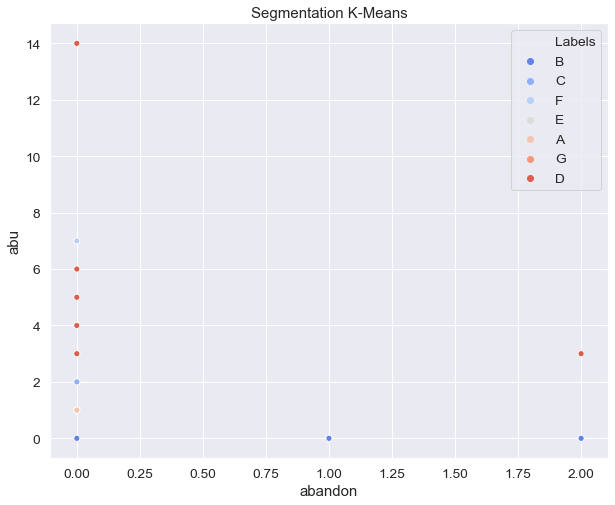

In [27]:
x_axis = df_segm_kmeans['abandon']
y_axis = df_segm_kmeans['abu']
plt.figure(figsize=(10,8))
sns.scatterplot(x_axis,y_axis,hue=df_segm_kmeans['Labels'],palette='coolwarm')
plt.title('Segmentation K-Means')
plt.show()